# A demo of XYZ and RDKitMol

There is no easy way to convert xyz to RDKit Mol/RWMol. Here RDKitMol shows a possibility by using openbabel as a molecule perception backend. There is another possibility introduced by https://github.com/jensengroup/xyz2mol. Maybe it can be integrated to RDKitMol as well

In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath('')))

from rdmc.mol import RDKitMol

### 1. An example of xyz str block

In [2]:
######################################
# INPUT
xyz="""14

C         -1.77596        0.55032       -0.86182
C         -1.86964        0.09038       -2.31577
H         -0.88733        1.17355       -0.71816
H         -1.70996       -0.29898       -0.17103
O         -2.90695        1.36613       -0.53334
C         -0.58005       -0.57548       -2.76940
H         -0.35617       -1.45641       -2.15753
H          0.26635        0.11565       -2.71288
H         -0.67469       -0.92675       -3.80265
O         -2.92111       -0.86791       -2.44871
H         -2.10410        0.93662       -2.97107
O         -3.87923        0.48257        0.09884
H         -4.43402        0.34141       -0.69232
O         -4.16782       -0.23433       -2.64382
"""

xyz_wo_header = """O 2.136128  0.058786  -0.999372
C -1.347448  0.039725  0.510465
C 0.116046  -0.220125  0.294405
C 0.810093  0.253091  -0.73937
H -1.530204  0.552623  1.461378
H -1.761309  0.662825  -0.286624
H -1.923334  -0.892154  0.536088
H 0.627132  -0.833978  1.035748
H 0.359144  0.869454  -1.510183
H 2.513751  -0.490247  -0.302535"""
######################################

### 2. Use pybel to generate a OBMol from xyz

pybel backend

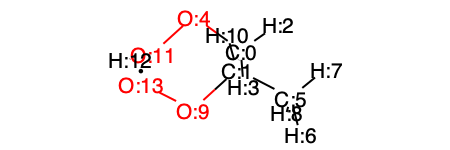

In [3]:
rdkitmol = RDKitMol.FromXYZ(xyz, backend='pybel', header=True)
rdkitmol

Without header

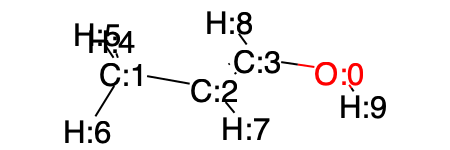

In [4]:
rdkitmol = RDKitMol.FromXYZ(xyz_wo_header, backend='pybel', header=False)
rdkitmol

Jensen backend

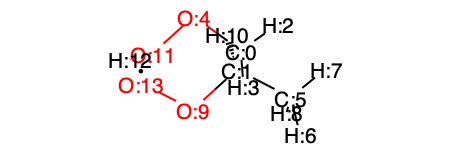

In [5]:
rdkitmol = RDKitMol.FromXYZ(xyz, backend='jensen', header=True)
rdkitmol

Options for Jensen et al. method

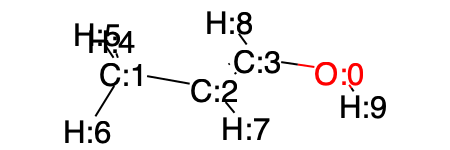

In [6]:
rdkitmol = RDKitMol.FromXYZ(xyz_wo_header, backend='jensen',
                            header=False,
                            allow_charged_fragments=True,
                            use_graph=False,
                            use_huckel=True,
                            embed_chiral=False)
rdkitmol

### 3. Check the xyz of rdkitmol conformer

In [7]:
rdkitmol.GetConformer().GetPositions()

array([[ 2.136128,  0.058786, -0.999372],
       [-1.347448,  0.039725,  0.510465],
       [ 0.116046, -0.220125,  0.294405],
       [ 0.810093,  0.253091, -0.73937 ],
       [-1.530204,  0.552623,  1.461378],
       [-1.761309,  0.662825, -0.286624],
       [-1.923334, -0.892154,  0.536088],
       [ 0.627132, -0.833978,  1.035748],
       [ 0.359144,  0.869454, -1.510183],
       [ 2.513751, -0.490247, -0.302535]])

### 4. Export xyz

In [8]:
print(rdkitmol.ToXYZ(header=False))

O      2.136128    0.058786   -0.999372
C     -1.347448    0.039725    0.510465
C      0.116046   -0.220125    0.294405
C      0.810093    0.253091   -0.739370
H     -1.530204    0.552623    1.461378
H     -1.761309    0.662825   -0.286624
H     -1.923334   -0.892154    0.536088
H      0.627132   -0.833978    1.035748
H      0.359144    0.869454   -1.510183
H      2.513751   -0.490247   -0.302535
